<a href="https://colab.research.google.com/github/scapolingua/Deep-Learning/blob/master/PrezzodelCacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install statsmodels

Attenzione: alcune righe hanno date non valide e saranno rimosse.
    Data     Aperto       Alto      Basso     Chiudi Chiusura_rettificate  \
0    NaT  10.538,00  11.226,00  10.503,00  11.173,00            11.173,00   
1    NaT  10.889,00  11.150,00  10.742,00  10821 ,00            10.821,00   
2    NaT  11.034,00  11.293,00  10.762,00  10.951,00            10.951,00   
3    NaT  10.500,00  11.029,00  10.480,00  10.928,00            10.928,00   
4    NaT  10.823,00  10.920,00  10.525,00  10.570,00            10.570,00   
..   ...        ...        ...        ...        ...                  ...   
242  NaT   4.815,00   4.840,00   4.610,00   4.625,00             4.625,00   
243  NaT   467 9,00   4.808,00   4.658,00   4.785,00             4.785,00   
244  NaT   4.570,00   4.835,00   4.570,00   4.634,00             4.634,00   
245  NaT   4.589,00   4.607,00   4.529,00   4.565,00             4.565,00   
246  NaT   4.499,00   4.607,00   4.479,00   4.583,00             4.583,00   

     Volu

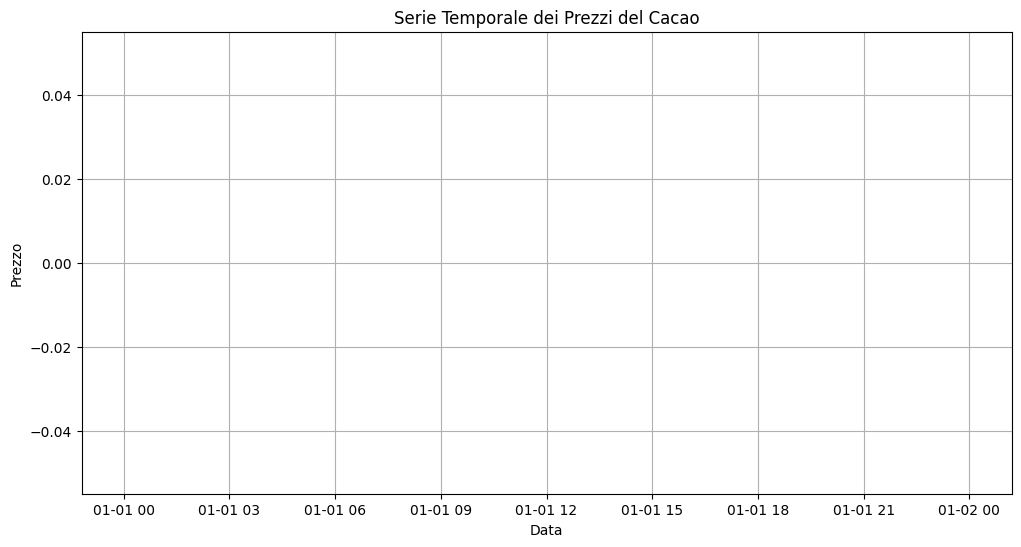

ARIMA(0, 0, 0) - AIC: 2.0
ARIMA(0, 0, 1) - AIC: 4.0
ARIMA(0, 0, 2) - AIC: 6.0
ARIMA(0, 1, 0) - AIC: 2.0
ARIMA(0, 1, 1) - AIC: 4.0
ARIMA(0, 1, 2) - AIC: 6.0
ARIMA(0, 2, 0) - AIC: 2.0
ARIMA(0, 2, 1) - AIC: 4.0
ARIMA(0, 2, 2) - AIC: 6.0
ARIMA(1, 0, 0) - AIC: 4.0
ARIMA(1, 0, 1) - AIC: 6.0
Errore per ARIMA(1, 0, 2): Schur decomposition solver error.
ARIMA(1, 1, 0) - AIC: 4.0
ARIMA(1, 1, 1) - AIC: 6.0
Errore per ARIMA(1, 1, 2): Schur decomposition solver error.
ARIMA(1, 2, 0) - AIC: 4.0
ARIMA(1, 2, 1) - AIC: 6.0
Errore per ARIMA(1, 2, 2): Schur decomposition solver error.
ARIMA(2, 0, 0) - AIC: 6.0
ARIMA(2, 0, 1) - AIC: 8.0
Errore per ARIMA(2, 0, 2): Schur decomposition solver error.
ARIMA(2, 1, 0) - AIC: 6.0
ARIMA(2, 1, 1) - AIC: 8.0
Errore per ARIMA(2, 1, 2): Schur decomposition solver error.
ARIMA(2, 2, 0) - AIC: 6.0
ARIMA(2, 2, 1) - AIC: 8.0
Errore per ARIMA(2, 2, 2): Schur decomposition solver error.
Il modello ottimale è: ARIMA(0, 0, 0) - AIC: 2.0
                               SARIMAX 

<Figure size 2000x1000 with 0 Axes>

IndexError: index -1 is out of bounds for axis 0 with size 0

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
#from statsmodels.tsa.statespace.arima_model import ARIMA, ARMA

import itertools
import warnings

warnings.filterwarnings("ignore")

# Caricamento del file CSV
data = pd.read_csv("Cartel1.csv", sep=';')


# Pulizia e conversione della colonna 'Data' in formato datetime
data['Data'] = pd.to_datetime(data['Data'], format="%d-%b-%y", errors='coerce')

# Controllo delle righe con errori di conversione della data
if data['Data'].isnull().any():
    print("Attenzione: alcune righe hanno date non valide e saranno rimosse.")
    print(data[data['Data'].isnull()])
    data = data.dropna(subset=['Data'])

# Pulizia delle colonne numeriche
for col in ['Aperto', 'Alto', 'Basso', 'Chiudi', 'Chiusura_rettificate', 'Volume']:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Rimuovere righe con valori mancanti nelle colonne essenziali
data = data.dropna(subset=['Data', 'Chiudi'])

# Imposta 'Data' come indice
data = data.set_index('Data')

# Visualizzare le prime righe del dataframe
print("Dataframe pulito:")
print(data.head())

# Tracciare la serie temporale per la colonna 'Chiudi'
# Usare data.index per l'asse x poiché 'Data' è l'indice
plt.figure(figsize=(12, 6))  # Set figure size here
plt.plot(data.index, data['Chiudi'], linestyle="-")
# Changed 'style' to 'linestyle' to specify the line style

plt.title("Serie Temporale dei Prezzi del Cacao")
plt.xlabel("Data")
plt.ylabel("Prezzo")
plt.grid()
plt.show()

# Definizione dei parametri per ARIMA
# Reduced the range of p, d, q to 2
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))


# Ricerca del modello ottimale
aic = []
parameters = []


for param in pdq:
    try:
        # Added seasonal_order=(0, 0, 0, 0) to potentially address seasonality if present
        # Added simple_differencing=True to potentially address the data length issue
        model = SARIMAX(data['Chiudi'], order=param, seasonal_order=(0, 0, 0, 0), enforce_stationarity=True, enforce_invertibility=True, simple_differencing=True)
        result = model.fit(disp=False) # Suppress output during model fitting
        aic.append(result.aic)
        parameters.append(param)
        print(f"ARIMA{param} - AIC: {result.aic}")
    except Exception as e:
        print(f"Errore per ARIMA{param}: {e}")
        continue



# Individuazione del modello con AIC più basso
if len(aic) > 0:
    index_min = aic.index(min(aic))
    optimal_param = parameters[index_min]
    print(f"Il modello ottimale è: ARIMA{optimal_param} - AIC: {aic[index_min]}")

    # Fit del modello ottimale
    optimal_model = SARIMAX(data['Chiudi'], order=optimal_param, enforce_stationarity=True, enforce_invertibility=True)
    optimal_result = optimal_model.fit()

    # Sommario del modello
    print(optimal_result.summary())

    # Visualizzazione diagnostica
    plt.figure(figsize=(20, 10))
    #optimal_result.plot_diagnostics()
    plt.show()

    # Previsioni
    forecast = optimal_result.get_forecast(steps=12)
    forecast_index = pd.date_range(start=data.index[-1], periods=13, freq='D')[1:]
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Grafico delle previsioni
    plt.plot(data['Chiudi'], label='Osservati', color='blue')
    plt.plot(forecast_index, forecast_values, label='Previsione', color='red')
    plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.legend()
    plt.title("Previsioni ARIMA")
    plt.xlabel("Data")
    plt.ylabel("Prezzo")
    plt.grid()
    plt.savefig('miofile.png', dpi=300)
    plt.show()
else:
    print("Nessun modello ARIMA valido è stato trovato.")


Before Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data                  247 non-null    object
 1   Aperto                247 non-null    object
 2   Alto                  247 non-null    object
 3   Basso                 247 non-null    int64 
 4   Chiudi                247 non-null    object
 5   Chiusura_rettificate  247 non-null    object
 6   Volume                247 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.6+ KB

After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data                  247 non-null    datetime64[ns]
 1   Aperto                247 non-null    object        
 2   Alto            

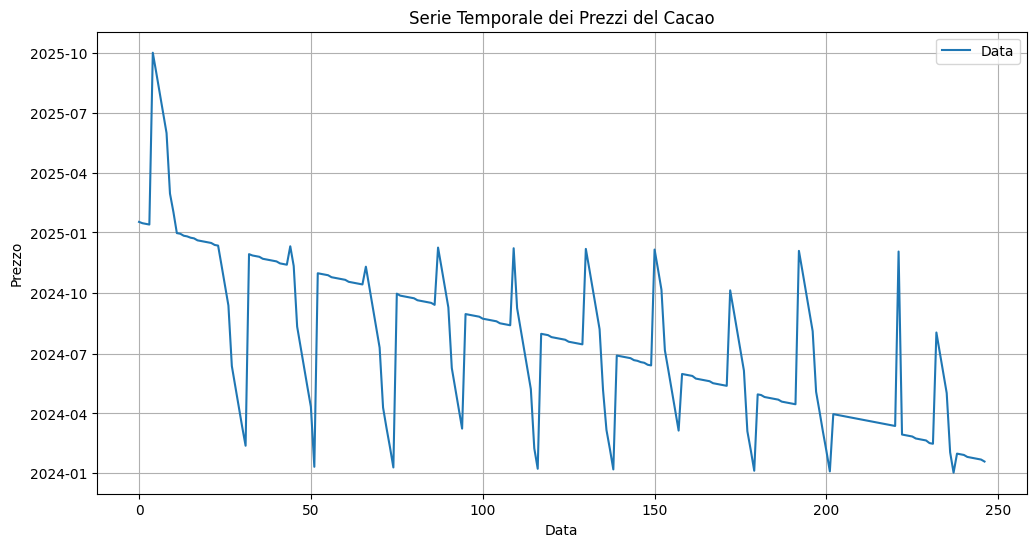

Errore per ARIMA(0, 0, 0): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 0, 1): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 0, 2): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 1, 0): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 1, 1): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 1, 2): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 2, 0): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 2, 1): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per ARIMA(0, 2, 2): Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
Errore per

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
import warnings

warnings.filterwarnings("ignore")

# Caricamento del file CSV
data = pd.read_csv("Cartel1.csv", sep=';')



# Creating the DataFrame
data = pd.DataFrame(data)

# Checking the initial data type of the 'Date' column
print("Before Conversion:")
data.info()

# Converting the 'Date' column to datetime format using astype()
data['Data'] = df['Data'].astype('datetime64[ns]')
#data['Aperto'] = data['Aperto'].astype(float)
#data['Alto'] = data['Alto'].astype(float)
#data['Basso'] = data['Basso'].astype(float)
#data['Chiuso'] = data['Chiuso'].astype(float)
# Checking the data type after conversion
print("\nAfter Conversion:")
data.info()


# Pulizia e conversione della colonna 'Data' in formato datetime
#data['Data'] = pd.to_datetime(data['Data'], format="%d-%m-%y", errors='coerce')

# Controllo delle righe con errori di conversione della data
if data['Data'].isnull().any():
    print("Attenzione: alcune righe hanno date non valide e saranno rimosse.")
    print(data[data['Data'].isnull()])
    data = data.dropna(subset=['Data'])

print("1")
'''
# Pulizia delle colonne numeriche
for col in ['Aperto', 'Alto', 'Basso', 'Chiudi', 'Chiusura_rettificate', 'Volume']:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace(' ', '', regex=False).str.replace(',', '.', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')
'''
# Rimuovere righe con valori mancanti nelle colonne essenziali
#data = data.dropna(subset=['Data', 'Chiudi'])

# Imposta 'Data' come indice
data = data.set_index('Data')

# Check if data is empty after cleaning
if data.empty:
    print("Errore: Il DataFrame è vuoto dopo la pulizia dei dati. Controllare il file CSV e il processo di pulizia.")
else:
    # Proceed with the rest of the code if data is not empty
    # Visualizzare le prime righe del dataframe
    print("Dataframe pulito:")
    print(data.head())

print("2")
    # ... (rest of your existing code for plotting, model fitting, and forecasting) ...

# Tracciare la serie temporale per le colonne 'Aperto' e 'Chiudi'
#data[['Data', 'Chiudi']].plot(style="-", figsize=(12, 6))
# Use this:
#data[['Chiudi']].plot(style="-", figsize=(12, 6))  # Plot only 'Chiudi'
# Or this to reset the index before plotting
data = data.reset_index()
data[['Data', 'Chiudi']].plot(style="-", figsize=(12, 6))


plt.title("Serie Temporale dei Prezzi del Cacao")
plt.xlabel("Data")
plt.ylabel("Prezzo")
plt.grid()
plt.show()

# Definizione dei parametri per ARIMA
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Ricerca del modello ottimale
aic = []
parameters = []

for param in pdq:
    try:
        model = SARIMAX(data['Chiudi'], order=param, enforce_stationarity=True, enforce_invertibility=True)
        result = model.fit()
        aic.append(result.aic)
        parameters.append(param)
        print(f"ARIMA{param} - AIC: {result.aic}")
    except Exception as e:
        print(f"Errore per ARIMA{param}: {e}")
        continue

# Individuazione del modello con AIC più basso
if len(aic) > 0:
    index_min = aic.index(min(aic))
    optimal_param = parameters[index_min]
    print(f"Il modello ottimale è: ARIMA{optimal_param} - AIC: {aic[index_min]}")

    # Fit del modello ottimale
    optimal_model = SARIMAX(data['Chiudi'], order=optimal_param, enforce_stationarity=True, enforce_invertibility=True)
    optimal_result = optimal_model.fit()

    # Sommario del modello
    print(optimal_result.summary())

    # Visualizzazione diagnostica
    plt.figure(figsize=(20, 10))
    optimal_result.plot_diagnostics()
    plt.show()

    # Previsioni
    forecast = optimal_result.get_forecast(steps=12)
    forecast_index = pd.date_range(start=data.index[-1], periods=13, freq='D')[1:]
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Grafico delle previsioni
    plt.plot(data['Chiudi'], label='Osservati', color='blue')
    plt.plot(forecast_index, forecast_values, label='Previsione', color='red')
    plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.legend()
    plt.title("Previsioni ARIMA")
    plt.xlabel("Data")
    plt.ylabel("Prezzo")
    plt.grid()
    plt.savefig('miofile.png', dpi=300)
    plt.show()
else:
    print("Nessun modello ARIMA valido è stato trovato.")
